In [ ]:
# default_exp api

In [ ]:
#hide_input
from pivotpy.g_utils import nav_links 
nav_links(7)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
> [&nbsp;`▶` MainAPI●&nbsp;](https://massgh.github.io/pivotpy/MainAPI)  


# API
Functions and Classes in this module are directly accessible from main import i.e. `import pivotpy as pp`. For most of work, this is sufficient unless you need very fine control on what todo. 

In [ ]:
#export
import os
import numpy as np
import plotly.graph_objects as go 
try:
    from pivotpy import vr_parser as vp
    from pivotpy import s_plots as sp
    from pivotpy import i_plots as ip
    from pivotpy import sio as sio
    from pivotpy import widgets as wdg
    from pivotpy import g_utils as gu
except:
    import pivotpy.vr_parser as vp
    import pivotpy.s_plots as sp
    import pivotpy.i_plots as ip
    import pivotpy.sio as sio
    import pivotpy.widgets as wdg
    import pivotpy.g_utils as gu
    
def _sub_doc(from_func,skip_param=None,replace={}):
    """Assing __doc__ from other function. Replace words in docs where need."""
    def wrapper(func):
        docs = '\n'.join(line for line in from_func.__doc__.splitlines() if skip_param not in line)
        for k,v in replace.items():
            docs = docs.replace(k,v)
        func.__doc__ = docs
        return func
    return wrapper


In [ ]:
#hide_input
# To run notebook smoothly, not for module export
from nbdev.showdoc import show_doc
import types
def _doc_class_memebers(cls):
    """Show all class memebers' docs."""
    for name,func in cls.__dict__.items():
        if isinstance(func, (types.FunctionType,types.MethodType)) and name[0] != '_':
            show_doc(func)
def _doc_it(obj):
    """Show docs of object."""
    show_doc(obj)
    
__all__ =[] # This is to enable dynamic setting of variables, will come in module export automatically 


In [ ]:
#export 
# Direct function exports from modules 
_memebers = (
    sio.InvokeMaterialsProject,
    sio.get_kpath,
    sio.str2kpath,
    sio.fancy_quiver3d,
    wdg.generate_summary,
    wdg.VasprunApp,
    wdg.KPathApp,
    gu.set_dir,
    gu.get_child_items,
    gu.color,
    gu.transform_color,
    gu.interpolate_data,
    vp.split_vasprun,
    ip.iplot2html,
    sp.plt2html,
    sp.plt2text,
    sp.show,
    sp.savefig
)

# Subset of functions from modules in __all__ to make exportable as *
__all__ = [*[_m.__name__ for _m in _memebers],*[a for a in __all__ if a != '__all__']]
for _m in _memebers:
    locals()[_m.__name__] = _m # Assign to local namespace that can be exported, classes only have __name__, not name

In [ ]:
#hide_input
for _m in _memebers:
    _doc_it(_m)

<h2 id="InvokeMaterialsProject" class="doc_header"><code>class</code> <code>InvokeMaterialsProject</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/sio.py#L191" class="source_link" style="float:right">[source]</a></h2>

> <code>InvokeMaterialsProject</code>(**`api_key`**=*`None`*)

    

<h4 id="get_kpath" class="doc_header"><code>get_kpath</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/sio.py#L310" class="source_link" style="float:right">[source]</a></h4>

> <code>get_kpath</code>(**`hsk_list`**=*`[]`*, **`labels`**=*`[]`*, **`n`**=*`5`*, **`weight`**=*`None`*, **`ibzkpt`**=*`None`*, **`outfile`**=*`None`*)

Generate list of kpoints along high symmetry path. Options are write to file or return KPOINTS list.
It generates uniformly spaced point with input `n` as just a scale factor of number of points per unit length.
You can also specify custom number of kpoints in an interval by putting number of kpoints as 4th entry in left kpoint.
- **Parameters**
    - hsk_list : N x 3 list of N high symmetry points, if broken path then [[N x 3],[M x 3],...].
                Optionally you can put a 4 values point where 4th entry will decide number of kpoints in current interval.
                Make sure that points in a connected path patch are at least two i.e. `[[x1,y1,z1],[x2,y2,z2]]` or `[[x1,y1,z1,N],[x2,y2,z2]]`.
    - n        : int, number per unit length, this makes uniform steps based on distance between points.
    - weight : Float, if None, auto generates weights.
    - ibzkpt : Path to ibzkpt file, required for HSE calculations.
    - labels : Hight symmetry points labels. Good for keeping record of lables and points indices for later use.
                > Note: If you do not want to label a point, label it as 'skip' at its index and it will be removed.
    - outfile: Path/to/file to write kpoints.

If `outfile = None`, KPONITS file content is printed.

<h4 id="str2kpath" class="doc_header"><code>str2kpath</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/sio.py#L409" class="source_link" style="float:right">[source]</a></h4>

> <code>str2kpath</code>(**`kpath_str`**, **`n`**=*`5`*, **`weight`**=*`None`*, **`ibzkpt`**=*`None`*, **`outfile`**=*`None`*)

Get Kpath from a string of kpoints (Line-Mode like). Useful in Terminal.
- **Parameters**
    - kpath_str: str, a multiline string similiar to line mode of KPOINTS, initial 4 lines are not required.
        - If you do not want to label a point, label it as 'skip' and it will be removed.
        - You can add an interger at end of a line to customize number of points in a given patch.
        - Each empty line breaks the path, so similar points before and after empty line are useless here.
    - n      : int, number per unit length, this makes uniform steps based on distance between points.
    - weight : Float, if None, auto generates weights.
    - ibzkpt : Path to ibzkpt file, required for HSE calculations.
    - outfile: Path/to/file to write kpoints.

- **Example**
    > str2kpath('''0 0 0 !$\Gamma$ 3
                0.25 0.25 0.25 !L''')
    > Automatically generated using PivotPy with HSK-INDS = [0, -1], LABELS = ['$\Gamma$', 'L'], SEG-INDS = []
        >   3
    > Reciprocal Lattice
    >   0.0000000000    0.0000000000    0.0000000000    0.333333
    >   0.1250000000    0.1250000000    0.1250000000    0.333333
    >   0.2500000000    0.2500000000    0.2500000000    0.333333

<h4 id="fancy_quiver3d" class="doc_header"><code>fancy_quiver3d</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/sio.py#L51" class="source_link" style="float:right">[source]</a></h4>

> <code>fancy_quiver3d</code>(**`X`**, **`Y`**, **`Z`**, **`U`**, **`V`**, **`W`**, **`ax`**=*`None`*, **`C`**=*`'r'`*, **`L`**=*`0.7`*, **`mutation_scale`**=*`10`*, **\*\*`kwargs`**)

Plots 3D arrows on a given ax. See [FancyArrowPatch](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.FancyArrowPatch.html).
- **Parameters**
    - X, Y, Z : 1D arrays of coordinates of arrows' tail point.
    - U, V, W : 1D arrays of dx,dy,dz of arrows.
    - ax: 3D axes, if not given, auto created.
    - C : 1D colors array mapping for arrows. Could be one color.
    - L : 1D linwidths array mapping for arrows. Could be one linewidth.
    - mutation_scale: Arrow head width/size scale. Default is 10.
    - kwargs: FancyArrowPatch's keyword arguments excluding positions,color, lw and mutation_scale, shrinkA, shrinkB which are already used. An important keyword argument is `arrowstyle` which could be '->','-|>', their inverted forms and many more. See on matplotlib.

<h4 id="generate_summary" class="doc_header"><code>generate_summary</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L483" class="source_link" style="float:right">[source]</a></h4>

> <code>generate_summary</code>(**`paths_list`**=*`None`*)



<h2 id="VasprunApp" class="doc_header"><code>class</code> <code>VasprunApp</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L529" class="source_link" style="float:right">[source]</a></h2>

> <code>VasprunApp</code>(**`height`**=*`580`*)

Display a GUI for vasp output analysis. `self.theme_colors` can be used to edit custom theme.
- **Usage Example**

```python
import pivotpy as pp
va = pp.VasprunApp()
va.cache_data = False #Turn off cache globally.
va.evr_kws['elim'] = [-2,2] #Only Bands in this range will be included. Global accross project, can change anytime.
va.evr_kws['try_pwsh'] = False #Defult is True. Tries to load Powershell exported data.
va.ibands_kws['mode'] = 'bands' #Change graph mode from 'markers' to 'bands'. Setting it to 'lines' is not recommended in live graph, it could hang all UI.
va.show() #Displays App and do work!
va.theme_colors = pp.dark_colors #Set theme to dark externally and edit dictionary values to make your own theme
va.splot(**kwargs) #Get matplotlib plot of current data.
va.df #After you do some analysis and hit `Project Summary` button, get DataFrame.
va.fig #Get current fig in Notebook cell.
```

<h2 id="KPathApp" class="doc_header"><code>class</code> <code>KPathApp</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/widgets.py#L1019" class="source_link" style="float:right">[source]</a></h2>

> <code>KPathApp</code>(**`path`**=*`'POSCAR'`*)

View and trace path on BZ.
- **Usage**
    > ka = KPathApp()
    > ka.show() #Display app
    > ka.splot() #get matplotlib figure

<h4 id="set_dir" class="doc_header"><code>set_dir</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/g_utils.py#L45" class="source_link" style="float:right">[source]</a></h4>

> <code>set_dir</code>(**`path`**)

work in some directory and come back

<h4 id="get_child_items" class="doc_header"><code>get_child_items</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/g_utils.py#L133" class="source_link" style="float:right">[source]</a></h4>

> <code>get_child_items</code>(**`path`**=*`'E:\\Research\\pivotpy'`*, **`depth`**=*`None`*, **`recursive`**=*`True`*, **`include`**=*`None`*, **`exclude`**=*`None`*, **`filesOnly`**=*`False`*, **`dirsOnly`**=*`False`*)

- Returns selected directories/files recursively from a parent directory.
- **Parameters**
    - path    : path to a parent directory, default is `"."`
    - depth   : int, subdirectories depth to get recursively, default is None to list all down.
    - recursive : If False, only list current directory items, if True,list all items recursively down the file system.
    - include: Default is None and includes everything. String of patterns separated by | to keep, could be a regular expression.
    - exclude: Default is None and removes nothing. String of patterns separated by | to drop,could be a regular expression.
    - filesOnly : Boolean, if True, returns only files.
    - dirsOnly  : Boolean, if True, returns only directories.
- **Returns**
    - GLOB : Tuple (children,parent), children is list of selected directories/files and parent is given path. Access by index of by `get_child_items().{children,path}`.

<h2 id="color" class="doc_header"><code>class</code> <code>color</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/g_utils.py#L188" class="source_link" style="float:right">[source]</a></h2>

> <code>color</code>()



<h4 id="transform_color" class="doc_header"><code>transform_color</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/g_utils.py#L416" class="source_link" style="float:right">[source]</a></h4>

> <code>transform_color</code>(**`arr`**, **`s`**=*`1`*, **`c`**=*`1`*, **`b`**=*`0`*, **`mixing_matrix`**=*`None`*)

- Color transformation such as brightness, contrast, saturation and mixing of an input color array. `c = -1` would invert color,keeping everything else same.
- **Parameters**
    - arr: input array, a single RGB/RGBA color or an array with inner most dimension equal to 3 or 4. e.g. [[[0,1,0,1],[0,0,1,1]]].
    - c  : contrast, default is 1. Can be a float in [-1,1].
    - s  : saturation, default is 1. Can be a float in [-1,1]. If s = 0, you get a gray scale image.
    - b  : brightness, default is 0. Can be a float in [-1,1] or list of three brightnesses for RGB components.
    - mixing_matrix: A 3x3 matrix to mix RGB values, such as `pp.color_matrix`.

[Recoloring](https://docs.microsoft.com/en-us/windows/win32/gdiplus/-gdiplus-recoloring-use?redirectedfrom=MSDN)
[Rainmeter](https://docs.rainmeter.net/tips/colormatrix-guide/)

<h4 id="interpolate_data" class="doc_header"><code>interpolate_data</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/g_utils.py#L57" class="source_link" style="float:right">[source]</a></h4>

> <code>interpolate_data</code>(**`x`**, **`y`**, **`n`**=*`10`*, **`k`**=*`3`*)

- Returns interpolated xnew,ynew. If two points are same, it will add 0.1*min(dx>0) to compensate it.
- **Parameters**
    - x: 1D array of size p,
    - y: ndarray of size p*q*r,....
    - n: Number of points to add between two given points.
    - k: Polynomial order to interpolate.

- Only axis 0 will be interpolated. If you want general interploation, use `from scipy.interpolate import make_interp_spline, BSpline`

- **General Usage**: K(p),E(p,q) input from bandstructure.
    - `Knew,Enew= interpolate_data(K,E,n=10,k=3)`. cubic interploation

<h4 id="split_vasprun" class="doc_header"><code>split_vasprun</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/vr_parser.py#L1044" class="source_link" style="float:right">[source]</a></h4>

> <code>split_vasprun</code>(**`path`**=*`None`*)

- Splits a given vasprun.xml file into a smaller _vasprun.xml file plus _set[1,2,3,4].txt files which contain projected data for each spin set.
- **Parameters**
    - path: path/to/vasprun.xml file.
- **Output**
    - _vasprun.xml file with projected data.
    - _set1.txt for projected data of colinear calculation.
    - _set1.txt for spin up data and _set2.txt for spin-polarized case.
    - _set[1,2,3,4].txt for each spin set of non-colinear calculations.

<h4 id="iplot2html" class="doc_header"><code>iplot2html</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/i_plots.py#L174" class="source_link" style="float:right">[source]</a></h4>

> <code>iplot2html</code>(**`fig`**, **`filename`**=*`None`*, **`out_string`**=*`False`*, **`modebar`**=*`True`*)

- Writes plotly's figure as HTML file or display in IPython which is accessible when online. It is different than plotly's `fig.to_html` as it is minimal in memory. If you need to have offline working file, just use `fig.write_html('file.html')` which will be larger in size.
- **Parameters**
    - fig      : A plotly's figure object.
    - filename : Name of file to save fig. Defualt is None and show plot in Colab/Online or return hrml string.
    - out_string: If True, returns HTML string, if False displays graph if possible.

<h4 id="plt2html" class="doc_header"><code>plt2html</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/s_plots.py#L1249" class="source_link" style="float:right">[source]</a></h4>

> <code>plt2html</code>(**`plt_fig`**=*`None`*, **`transparent`**=*`True`*, **`dash_html`**=*`None`*)

- Returns base64 encoded Image to display in notebook or HTML <svg> or plotly's dash_html_components.Img object.
- **Parameters**
    - plt_fig    : Matplotlib's figure instance, auto picks as well.
    - transparent: True of False for fig background.
    - dash_html  : Default is None which results in an image display in jupyter notebook.
        - If True, returns html.Img object for plotly's dash.
        - If False, returns <svg> object to embed in HTML DOM.

<h4 id="plt2text" class="doc_header"><code>plt2text</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/s_plots.py#L1305" class="source_link" style="float:right">[source]</a></h4>

> <code>plt2text</code>(**`plt_fig`**=*`None`*, **`width`**=*`144`*, **`vscale`**=*`0.96`*, **`colorful`**=*`True`*, **`invert`**=*`False`*, **`crop`**=*`False`*, **`outfile`**=*`None`*)

Displays matplotlib figure in terminal as text. You should use a monospcae font like `Cascadia Code PL` to display image correctly. Use before plt.show().
- **Parameters**
    - plt_fig: Matplotlib's figure instance. Auto picks if not given.
    - width  : Character width in terminal, default is 144. Decrease font size when width increased.
    - vscale : Useful to tweek aspect ratio. Default is 0.96 and prints actual aspect in `Cascadia Code PL`. It is approximately `2*width/height` when you select a single space in terminal.
    - colorful: Default is False, prints colored picture if terminal supports it, e.g Windows Terminal.
    - invert  : Defult is False, could be useful for grayscale image.
    - crop    : Default is False. Crops extra background, can change image color if top left pixel is not in background, in that case set this to False.
    - outfile: If None, prints to screen. Writes on a file.

<h4 id="show" class="doc_header"><code>show</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/s_plots.py#L1283" class="source_link" style="float:right">[source]</a></h4>

> <code>show</code>(**`transparent`**=*`False`*)

Displays all available figures in browser without blocking terminal

<h4 id="savefig" class="doc_header"><code>savefig</code><a href="https://github.com/massgh/pivotpy/tree/master/pivotpy/s_plots.py#L1299" class="source_link" style="float:right">[source]</a></h4>

> <code>savefig</code>(**`filename`**, **`dpi`**=*`600`*, **\*\*`kwargs`**)

Save matplotlib's figure while handling existing files. `kwargs` are passed to `plt.savefig`

In [ ]:
#export
class POSCAR:
    "POSACR class to contain data and related methods"
    def __init__(self,path=None,content=None,_other_data=None):
        """Do not use `_other_data` yourself, it's for operations on poscar.
        Prefrence order: _other_data, content, path"""
        self.path = path
        self.content = content 
        self.bz = None
        self.primitive = False
        self.cell = None
        if _other_data:
            self._data = _other_data
        else:
            self._data = sio.export_poscar(path=path,content=content)
            
    @property
    def data(self):
        "Data object in POSCAR."
        return self._data
    
    @_sub_doc(sio.get_bz,'- path_pos')
    def get_bz(self, loop=True, digits=8, primitive=False):
        self.bz = sio.get_bz(path_pos=self.data.basis, loop=loop, digits=digits, primitive=primitive)
        self.primitive = primitive
        return self.bz
    
    def get_cell(self, loop=True, digits=8):
        "See docs of `get_bz`, same except space is inverted."
        self.cell = sio.get_bz(path_pos=self.data.rec_basis,loop=loop, digits=digits, primitive=True)
        return self.cell
    
    @_sub_doc(sio.splot_bz,'- path_pos_bz')
    @_sub_doc(sio.splot_bz,'- List')
    @_sub_doc(sio.splot_bz,'- Path')
    @_sub_doc(sio.splot_bz,'- Output')
    def splot_bz(self, ax=None, plane=None, color='blue', fill=True, vectors=True, v3=False, vname='b', colormap='plasma', light_from=(1, 1, 1), alpha=0.4):
        return sio.splot_bz(path_pos_bz = self.data.basis, ax=ax, plane=plane, color=color, fill=fill, vectors=vectors, v3=v3, vname=vname, colormap=colormap, light_from=light_from, alpha=alpha)
    
    def splot_cell(self, ax=None, plane=None, color='blue', fill=True, vectors=True, v3=False, vname='a', colormap='plasma', light_from=(1, 1, 1), alpha=0.4):
        "See docs of `splot_bz`, everything is same except space is inverted."
        return sio.splot_bz(path_pos_bz = self.data.rec_basis, ax=ax, plane=plane, color=color, fill=fill, vectors=vectors, v3=v3, vname=vname, colormap=colormap, light_from=light_from, alpha=alpha)
    
    @_sub_doc(sio.iplot_bz,'- path_pos_bz')
    @_sub_doc(sio.iplot_bz,'- List')
    @_sub_doc(sio.iplot_bz,'- Path')
    @_sub_doc(sio.iplot_bz,'- Output')
    def iplot_bz(self, fill=True, color='rgba(168,204,216,0.4)', background='rgb(255,255,255)', vname='b', alpha=0.4, ortho3d=True, fig=None):
        return sio.iplot_bz(path_pos_bz = self.data.basis, fill=fill, color=color, background=background, vname=vname, alpha=alpha, ortho3d=ortho3d, fig=fig)
    
    def iplot_cell(self, fill=True, color='rgba(168,204,216,0.4)', background='rgb(255,255,255)', vname='a', alpha=0.4, ortho3d=True, fig=None):
        "See docs of `iplot_bz`, everything is same except space is iverted."
        return sio.iplot_bz(path_pos_bz = self.data.rec_basis, fill=fill, color=color, background=background, vname=vname, alpha=alpha, ortho3d=ortho3d, fig=fig)
    
    @_sub_doc(sio.splot_lat,'- poscar')
    def splot_lat(self, sizes=50, colors=[], colormap=None, bond_length=None, tol=0.1, eps=0.01, eqv_sites=True, translate=None, line_width=1, edge_color=(1, 0.5, 0, 0.4), vectors=True, v3=False, plane=None, light_from=(1, 1, 1), fill=False, alpha=0.4, ax=None):
        return sio.splot_lat(poscar=self.data, sizes=sizes, colors=colors, colormap=colormap, bond_length=bond_length, tol=tol, eps=eps, eqv_sites=eqv_sites, translate=translate, line_width=line_width, edge_color=edge_color, vectors=vectors, v3=v3, plane=plane, light_from=light_from, fill=fill, alpha=alpha, ax=ax)
    
    @_sub_doc(sio.iplot_lat,'- poscar')
    def iplot_lat(self, sizes=10, colors='blue', bond_length=None, tol=0.1, eps=0.01, eqv_sites=True, translate=None, line_width=4, edge_color='black', fill=False, alpha=0.4, ortho3d=True, fig=None):
        return sio.iplot_lat(poscar=self.data, sizes=sizes, colors=colors, bond_length=bond_length, tol=tol, eps=eps, eqv_sites=eqv_sites, translate=translate, line_width=line_width, edge_color=edge_color, fill=fill, alpha=alpha, ortho3d=ortho3d, fig=fig)
    
    @_sub_doc(sio.write_poscar,'- poscar')
    def write(self, sd_list=None, outfile=None, overwrite=False):
        return sio.write_poscar(poscar = self.data, sd_list=sd_list, outfile=outfile, overwrite=overwrite)
    
    @_sub_doc(sio.join_poscars,'- poscar1',replace={'poscar2':'other'})
    def join(self,other, direction='z', tol=0.01):
        return POSCAR(_other_data = sio.join_poscars(poscar1=self.data, poscar2=other.data, direction=direction, tol=tol))
    
    @_sub_doc(sio.scale_poscar,'- poscar')
    def scale(self, scale=(1, 1, 1), tol=0.01):
        return POSCAR(_other_data = sio.scale_poscar(path_poscar=self.data, scale=scale, tol=tol))
    
    @_sub_doc(sio.fix_sites,'- poscar')
    def fix_sites(self, tol=0.01, eqv_sites=True, translate=None):
        return POSCAR(_other_data = sio.fix_sites(poscar=self.data, tol=tol, eqv_sites=eqv_sites, translate=translate))
    
    @_sub_doc(sio.get_kmesh,'- path_pos')
    def get_kmesh(self, n_xyz=[5, 5, 5], weight=None, ibzkpt=None, outfile=None):
        return sio.get_kmesh(n_xyz=n_xyz, weight=weight, ibzkpt=ibzkpt, path_pos=self.data.basis, outfile=outfile)
    
    def bring_in_cell(self,points):
        """Brings atoms's positions inside Cell and returns their R3 coordinates."""
        return sio.to_R3(self.data.basis, points= points)
    
    @_sub_doc(sio.kpoints2bz,'- bz')
    def bring_in_bz(self,kpoints):
        if not self.bz:
            return print('No BZ found. Please run get_bz() first.')
        return sio.kpoints2bz(self.bz, kpoints= kpoints,primitive = self.primitive)


In [ ]:
#hide_input
_doc_class_memebers(POSCAR)

<h4 id="POSCAR.get_bz" class="doc_header"><code>POSCAR.get_bz</code><a href="__main__.py#L22" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.get_bz</code>(**`loop`**=*`True`*, **`digits`**=*`8`*, **`primitive`**=*`False`*)

- Return required information to construct first Brillouin zone in form of tuple (basis, normals, vertices, faces).
- **Parameters**
    - loop   : If True, joins the last vertex of a BZ plane to starting vertex in order to complete loop.
    - digits : int, rounding off decimal places, no effect on intermediate calculations, just for pretty final results.
    - primitive: Defualt is False and returns Wigner-Seitz cell, If True returns parallelipiped in rec_basis.
- **Attributes**
    - basis   : get_bz().basis, recprocal lattice basis.
    - normals : get_bz().normals, all vertors that are perpendicular BZ faces/planes.
    - vertices: get_bz().vertices, all vertices of BZ, could be input into ConvexHull for constructing 3D BZ.
    - faces   : get_bz().faces, vertices arranged into faces, could be input to Poly3DCollection of matplotlib for creating BZ from faces' patches.
    - specials : get_bz().specials, Data with attributes `coords`,`kpoints` and `near` in on-one correspondence for high symmetry KPOINTS in recirprocal coordinates space. `near` gives indices of nearest special points around a vertex. All vertices with z > 0 are included.

<h4 id="POSCAR.get_cell" class="doc_header"><code>POSCAR.get_cell</code><a href="__main__.py#L28" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.get_cell</code>(**`loop`**=*`True`*, **`digits`**=*`8`*)

See docs of [`get_bz`](/pivotpy/StructureIO.html#get_bz), same except space is inverted.

<h4 id="POSCAR.splot_bz" class="doc_header"><code>POSCAR.splot_bz</code><a href="__main__.py#L33" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.splot_bz</code>(**`ax`**=*`None`*, **`plane`**=*`None`*, **`color`**=*`'blue'`*, **`fill`**=*`True`*, **`vectors`**=*`True`*, **`v3`**=*`False`*, **`vname`**=*`'b'`*, **`colormap`**=*`'plasma'`*, **`light_from`**=*`(1, 1, 1)`*, **`alpha`**=*`0.4`*)

- Plots matplotlib's static figure.
- **Parameters**
        - List of 3 basis vectors in real space.
        - Path/to/POSCAR.
        - Output of [`get_bz`](/pivotpy/StructureIO.html#get_bz) function.

    - fill       : True by defult, determines whether to fill surface of BZ or not.
    - color      : color to fill surface and stroke color.
    - vectors    : Plots basis vectors, default is True.
    - v3         : Plots 3rd vector as well. Only works in 2D and when `vectors=True`.
    - plane      : Default is None and plots 3D surface. Can take 'xy','yz','zx' to plot in 2D.
    - ax         : Auto generated by default, 2D/3D axes, auto converts in 3D on demand as well.
    - vname      : Default is `b` for reciprocal space, can set `a` for plotting cell as after `get_bz(get_bz().basis)` you get real space lattice back if `primitive=True` both times.
    - colormap  : If None, single color is applied, only works in 3D and `fill=True`. Colormap is applied along z.
    - light_from: Point from where light is thrown on BZ planes, default is (1,1,1). Only works on plane in 3D.
    - alpha    : Opacity of filling in range [0,1]. Increase for clear viewpoint.
- **Returns**
    - ax   : Matplotlib's 2D axes if `plane=None`.
    - ax3d : Matplotlib's 2D axes if `plane` is given.

> Tip: `splot_bz(rec_basis,primitive=True)` will plot cell in real space.

<h4 id="POSCAR.splot_cell" class="doc_header"><code>POSCAR.splot_cell</code><a href="__main__.py#L40" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.splot_cell</code>(**`ax`**=*`None`*, **`plane`**=*`None`*, **`color`**=*`'blue'`*, **`fill`**=*`True`*, **`vectors`**=*`True`*, **`v3`**=*`False`*, **`vname`**=*`'a'`*, **`colormap`**=*`'plasma'`*, **`light_from`**=*`(1, 1, 1)`*, **`alpha`**=*`0.4`*)

See docs of [`splot_bz`](/pivotpy/StructureIO.html#splot_bz), everything is same except space is inverted.

<h4 id="POSCAR.iplot_bz" class="doc_header"><code>POSCAR.iplot_bz</code><a href="__main__.py#L44" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.iplot_bz</code>(**`fill`**=*`True`*, **`color`**=*`'rgba(168,204,216,0.4)'`*, **`background`**=*`'rgb(255,255,255)'`*, **`vname`**=*`'b'`*, **`alpha`**=*`0.4`*, **`ortho3d`**=*`True`*, **`fig`**=*`None`*)

- Plots interactive figure showing axes,BZ surface, special points and basis, each of which could be hidden or shown.
- **Parameters**
        - List of 3 basis vectors in real space.
        - Path/to/POSCAR.
        - Output of [`get_bz`](/pivotpy/StructureIO.html#get_bz) function.

    - fill       : True by defult, determines whether to fill surface of BZ or not.
    - color      : color to fill surface 'rgba(168,204,216,0.4)` by default.
    - background : Plot background color, default is 'rgb(255,255,255)'.
    - vname      : Default is `b` for reciprocal space, can set `a` for plotting cell as after `get_bz(get_bz().basis)` you get real space lattice back if `primitive=True` both times.
    - alpha      : Opacity of BZ planes.
    - ortho3d    : Default is True, decides whether x,y,z are orthogonal or perspective.
    - fig        : (Optional) Plotly's `go.Figure`. If you want to plot on another plotly's figure, provide that.
- **Returns**
    - fig   : plotly.graph_object's Figure instance.

> Tip: `iplot_bz(rec_basis,primitive=True)` will plot cell in real space.

<h4 id="POSCAR.iplot_cell" class="doc_header"><code>POSCAR.iplot_cell</code><a href="__main__.py#L51" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.iplot_cell</code>(**`fill`**=*`True`*, **`color`**=*`'rgba(168,204,216,0.4)'`*, **`background`**=*`'rgb(255,255,255)'`*, **`vname`**=*`'a'`*, **`alpha`**=*`0.4`*, **`ortho3d`**=*`True`*, **`fig`**=*`None`*)

See docs of [`iplot_bz`](/pivotpy/StructureIO.html#iplot_bz), everything is same except space is iverted.

<h4 id="POSCAR.splot_lat" class="doc_header"><code>POSCAR.splot_lat</code><a href="__main__.py#L55" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.splot_lat</code>(**`sizes`**=*`50`*, **`colors`**=*`[]`*, **`colormap`**=*`None`*, **`bond_length`**=*`None`*, **`tol`**=*`0.1`*, **`eps`**=*`0.01`*, **`eqv_sites`**=*`True`*, **`translate`**=*`None`*, **`line_width`**=*`1`*, **`edge_color`**=*`(1, 0.5, 0, 0.4)`*, **`vectors`**=*`True`*, **`v3`**=*`False`*, **`plane`**=*`None`*, **`light_from`**=*`(1, 1, 1)`*, **`fill`**=*`False`*, **`alpha`**=*`0.4`*, **`ax`**=*`None`*)

Static plot of lattice.
- **Main Parameters**
    - sizes      : Size of sites. Either one int/float or list equal to type of ions.
    - bond_length: Length of bond in fractional unit [0,1]. It is scaled to V^1/3 and auto calculated if not provides.
    - colors: List of colos. If given, preffered over colormap, should have same length as type of ions.
Other parameters just mean what they seem to be.

> Tip: Use `plt.style.use('ggplot')` for better 3D perception.

<h4 id="POSCAR.iplot_lat" class="doc_header"><code>POSCAR.iplot_lat</code><a href="__main__.py#L59" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.iplot_lat</code>(**`sizes`**=*`10`*, **`colors`**=*`'blue'`*, **`bond_length`**=*`None`*, **`tol`**=*`0.1`*, **`eps`**=*`0.01`*, **`eqv_sites`**=*`True`*, **`translate`**=*`None`*, **`line_width`**=*`4`*, **`edge_color`**=*`'black'`*, **`fill`**=*`False`*, **`alpha`**=*`0.4`*, **`ortho3d`**=*`True`*, **`fig`**=*`None`*)

Interactive plot of lattice.
- **Main Parameters**
    - sizes      : Size of sites. Either one int/float or list equal to type of ions.
    - colors     : Colors of sites. Either one colors or list equal to type of ions.
    - bond_length: Length of bond in fractional unit [0,1]. It is scaled to V^1/3 and auto calculated if not provides.
Other parameters just mean what they seem to be.

<h4 id="POSCAR.write" class="doc_header"><code>POSCAR.write</code><a href="__main__.py#L63" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.write</code>(**`sd_list`**=*`None`*, **`outfile`**=*`None`*, **`overwrite`**=*`False`*)

Writes poscar data object to a file or returns string
- **Parameters**
    - sd_list  : A list ['T T T','F F F',...] strings to turn on selective dynamics at required sites. len(sd_list)==len(sites) should hold.
    - outfile  : str,file path to write on.
    - overwrite: bool, if file already exists, overwrite=True changes it.

<h4 id="POSCAR.join" class="doc_header"><code>POSCAR.join</code><a href="__main__.py#L67" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.join</code>(**`other`**, **`direction`**=*`'z'`*, **`tol`**=*`0.01`*)

Joins two POSCARs in a given direction. In-plane lattice parameters are kept from `poscar1` and basis of `other` parallel to `direction` is modified while volume is kept same.
- **Parameters**
    - direction: The joining direction. It is general and can join in any direction along basis. Expect one of ['a','b','c','x','y','z'].
    - tol: Default is 0.01. It is used to bring sites near 1 to near zero in order to complete sites in plane. Vasp relaxation could move a point, say at 0.00100 to 0.99800 which is not useful while merging sites.

<h4 id="POSCAR.scale" class="doc_header"><code>POSCAR.scale</code><a href="__main__.py#L71" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.scale</code>(**`scale`**=*`(1, 1, 1)`*, **`tol`**=*`0.01`*)

Create larger/smaller cell from a given POSCAR.
- **Parameters**
    - path_poscar: Path/to/POSCAR or `poscar` data object.
    - scale: Tuple of three values along (a,b,c) vectors. int or float values. If number of sites are not as expected in output, tweak `tol` instead of `scale`. You can put a minus sign with `tol` to get more sites and plus sign to reduce sites.
    - tol: It is used such that site positions are blow `1 - tol`, as 1 belongs to next cell, not previous one.
> Tip: scale = (2,2,2) enlarges a cell and next operation of (1/2,1/2,1/2) should bring original cell back.

<h4 id="POSCAR.fix_sites" class="doc_header"><code>POSCAR.fix_sites</code><a href="__main__.py#L75" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.fix_sites</code>(**`tol`**=*`0.01`*, **`eqv_sites`**=*`True`*, **`translate`**=*`None`*)

Add equivalent sites to make a full data shape of lattice. Returns same data after fixing.
- **Parameters**
    - tol   : Tolerance value. Default is 0.01.
    - eqv_sites: If True, add sites on edges and faces. If False, just fix coordinates, i.e. `pos > 1 - tol -> pos - 1`, useful for merging poscars to make slabs.
    - translate: A number(+/-) or list of three numbers to translate in x,y,z directions.

<h4 id="POSCAR.get_kmesh" class="doc_header"><code>POSCAR.get_kmesh</code><a href="__main__.py#L79" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.get_kmesh</code>(**`n_xyz`**=*`[5, 5, 5]`*, **`weight`**=*`None`*, **`ibzkpt`**=*`None`*, **`outfile`**=*`None`*)

- Generates uniform mesh of kpoints. Options are write to file, or return KPOINTS list.
- **Parameters**
    - n_xyz  : List of [nx ny nz] or integer. If integer given, it represents numbers of kpoints along smallest side in reciprocal space and kmesh is autoscaled.
    - weight : Float, if None, auto generates weights.
    - ibzkpt : Path to ibzkpt file, required for HSE calculations.
    - outfile: Path/to/file to write kpoints.

If `outfile = None`, KPOINTS file content is printed.

<h4 id="POSCAR.bring_in_cell" class="doc_header"><code>POSCAR.bring_in_cell</code><a href="__main__.py#L83" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.bring_in_cell</code>(**`points`**)

Brings atoms's positions inside Cell and returns their R3 coordinates.

<h4 id="POSCAR.bring_in_bz" class="doc_header"><code>POSCAR.bring_in_bz</code><a href="__main__.py#L87" class="source_link" style="float:right">[source]</a></h4>

> <code>POSCAR.bring_in_bz</code>(**`kpoints`**)

Brings KPOINTS inside BZ. Applies [`to_R3`](/pivotpy/StructureIO.html#to_R3) only if `primitive=True`.
- **Parameters**
    - kpoints  : List or array of KPOINTS to transorm into BZ or R3.
    - primitive: Default is False and brings kpoints into regular BZ. If True, returns `to_R3()`.

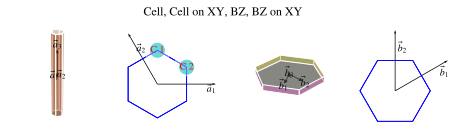

In [ ]:
import matplotlib.pyplot as plt, pivotpy as pp

poscar = POSCAR('POSCAR')
axs = pp.get_axes(ncols=4,figsize=(8,2))
poscar.splot_cell(ax=axs[0],colormap='hot',color='white').set_axis_off()
poscar.splot_cell(ax=axs[1],plane='xy').set_axis_off()
poscar.splot_bz(ax=axs[2],color='white').set_axis_off()
poscar.splot_bz(ax=axs[3],plane='xy').set_axis_off()
pos = poscar.bring_in_cell(poscar.data.positions)
axs[1].scatter(pos[:,0],pos[:,1],c='c',s=200)
axs[1].add_text(xs=pos[:,0],ys=pos[:,1],txts=poscar.data.labels,transform=False)
_ = plt.gcf().suptitle('Cell, Cell on XY, BZ, BZ on XY')

In [ ]:
#export 
class LOCPOT:
    def __init__(self,path=None,e = True,m = False):
        """
        - Returns Data from LOCPOT and similar structure files like CHG. Loads only single set out of 2/4 magnetization data to avoid performance/memory cost while can load electrostatic and one set of magnetization together.
        - **Parameters**
            - path: path/to/LOCPOT or similar stuructured file like CHG. LOCPOT is auto picked in CWD.
            - e   : Electric potential/charge density. Default is True.
            - m   : Magnetization density m. Default is False. If True, picks `m` for spin polarized case, and `m_x` for non-colinear case. Additionally it can take 'x','y' and 'z' in case of non-colinear calculations.
        - **Exceptions**
            - Would raise index error if magnetization density set is not present in LOCPOT/CHG in case `m` is not False.
        """
        self.path = path # Must be
        self.m = m # Required to put in plots.
        self.data = gu.export_potential(locpot=path, e=e,m=m)

    @_sub_doc(sp.plot_potential,'- e_or_m')
    @_sub_doc(sp.plot_potential,'- basis')
    def splot_e(self,operation='mean_z',ax=None,period=None,
                 lr_pos=(0.25,0.75),lr_widths = [0.5,0.5],
                 labels=(r'$V(z)$',r'$\langle V \rangle _{roll}(z)$',r'$\langle V \rangle $'),
                 colors = ((0,0.2,0.7),'b','r'),annotate=True):
        return sp.plot_potential(basis=self.data.basis,e_or_m=self.data.e,operation=operation,
                                    ax=ax,period=period,lr_pos=lr_pos,lr_widths=lr_widths,
                                    labels=labels,colors=colors,annotate=annotate)
    
    @_sub_doc(sp.plot_potential,'- e_or_m')
    @_sub_doc(sp.plot_potential,'- basis')
    def splot_m(self,operation='mean_z',ax=None,period=None,
                lr_pos = (0.25,0.75),lr_widths = [0.5,0.5],
                labels = (r'$M(z)$',r'$\langle M \rangle _{roll}(z)$',r'$\langle M \rangle $'),
                colors = ((0,0.2,0.7),'b','r'),annotate=True):
        if self.m:
            try:
                e_or_m = self.data.m 
            except:
                e_or_m = self.data.to_dict()[f'm_{self.m}']
        else:
            return print("Magnetization data set does not exist in {}".format(self.path))
        return sp.plot_potential(basis=self.data.basis,e_or_m=e_or_m,operation=operation,
                                    ax=ax,period=period,lr_pos=lr_pos,lr_widths=lr_widths,
                                    labels=labels,colors=colors,annotate=annotate)

    def view_period(self,period_guess=0.25,operation='mean_z',nslice=10,e_or_m=None,):
        """
        - Periodicity check by plotly's interactive plot.
        - **Parameters**
            - period_guess: Initial guess of period. Default is 0.25. Should be in [0,1].
            - operation   : Any of ['mean_x','min_x','max_x','mean_y','min_y','max_y','mean_z','min_z','max_z'].
            - nslice      : Default is 10. Number of periods around and including period_guess. e.g. If you give 0.25 as period_guess and nslice is 10, you will get 10 lines of rolling average over given data from where you can choose best fit or try another guess and so on.
            - e_or_m      : None by default. Not required in most cases as `view_period()` will try to get data itself from top class in order of `self.data.[e,m,m_x,m_y,m_z]` and if `self.data.e` exists it never goes to others, so you can overwrite this by setting `e_or_m = self.data.[your choice]`.
        """
        pos = period_guess
        check = ['mean_x','min_x','max_x','mean_y','min_y','max_y','mean_z','min_z','max_z']
        if operation not in check:
            return print("operation expects any of {!r}, got {}".format(check,operation))
        if e_or_m is None:
            try:
                data = self.data.e
            except:
                try:
                    data = self.data.m
                except:
                   data = self.data.to_dict()[f'm_{self.m}']
                else:
                    return print("Magnetization data set does not exist in {}".format(self.path))
        else:
            data = e_or_m

        _opr,_dir = operation.split('_')
        x_ind = 'xyz'.index(_dir)
        other_inds = tuple([i for i in [0,1,2] if i != x_ind])
        _func_ = np.min if _opr == 'min' else np.max if _opr == 'max' else np.mean
        
        fig = go.Figure()
        _arr = _func_(data,axis = other_inds)
        N = np.rint(pos*len(_arr)).astype(int)
        _range = range(int(N-nslice/2),int(N+nslice/2+1)) # +1 for range.
        for div in _range:
            if div > 0 and div < len(_arr):
                y = np.convolve(_arr+div,np.ones((div,))/div,mode='valid')
                x = np.linspace(0,1,len(y))
                h_text = ["{}: {:>5.3f}</br>v: {:>5.3f}".format(_dir,_h,_v-div) for _h,_v in zip(x,y)]
                fig.add_trace(go.Scatter(x=x,y=y,name="Roll_av({:>5.3f})".format(div/len(_arr)),hovertext=h_text))
        fig.update_layout(title = self.data.SYSTEM,font=dict(family="stix serif",size=14),
                          yaxis = go.layout.YAxis(title_text='No. of Points in Rolling Average'),
                          xaxis = go.layout.XAxis(title_text="{}({}<sub>max</sub>)".format(_dir,_dir)))
        return fig

In [ ]:
#hide_input
_doc_class_memebers(LOCPOT)

<h4 id="LOCPOT.splot_e" class="doc_header"><code>LOCPOT.splot_e</code><a href="__main__.py#L17" class="source_link" style="float:right">[source]</a></h4>

> <code>LOCPOT.splot_e</code>(**`operation`**=*`'mean_z'`*, **`ax`**=*`None`*, **`period`**=*`None`*, **`lr_pos`**=*`(0.25, 0.75)`*, **`lr_widths`**=*`[0.5, 0.5]`*, **`labels`**=*`('$V(z)$', '$\\langle V \\rangle _{roll}(z)$', '$\\langle V \\rangle $')`*, **`colors`**=*`((0, 0.2, 0.7), 'b', 'r')`*, **`annotate`**=*`True`*)

- Returns tuple(ax,Data) where Data contains resultatnt parameters of averaged potential of LOCPOT.
- **Parameters**
    - basis  : `export_potential().basis`.
    - operation: Default is 'mean_z'. What to do with provided volumetric potential data. Anyone of these 'mean_x','min_x','max_x','mean_y','min_y','max_y','mean_z','min_z','max_z'.
    - ax: Matplotlib axes, if not given auto picks.
    - period: Periodicity of potential in fraction between 0 and 1. For example if a slab is made of 4 super cells in z-direction, period=0.25.
    - lr_pos: Locations around which averages are taken.Default (0.25,0.75). Provide in fraction between 0 and 1. Center of period is located at these given fractions. Work only if period is given.
    - lr_widths: Default is [0.5,0.5], you may have slabs which have different lengths on left and right side. Provide a pair proportional to widths e.g (1,1), (1,1.1) etc. and it is auto normalized to 1. Works only if period is given.
    - labels: List of three labels for legend. Use plt.legend() or pp.add_legend() for labels to appear. First entry is data plot, second is its convolution and third is complete average.
    - colors: List of three colors for lines.
    - annotate: True by default, writes difference of right and left averages on plot.

<h4 id="LOCPOT.splot_m" class="doc_header"><code>LOCPOT.splot_m</code><a href="__main__.py#L27" class="source_link" style="float:right">[source]</a></h4>

> <code>LOCPOT.splot_m</code>(**`operation`**=*`'mean_z'`*, **`ax`**=*`None`*, **`period`**=*`None`*, **`lr_pos`**=*`(0.25, 0.75)`*, **`lr_widths`**=*`[0.5, 0.5]`*, **`labels`**=*`('$M(z)$', '$\\langle M \\rangle _{roll}(z)$', '$\\langle M \\rangle $')`*, **`colors`**=*`((0, 0.2, 0.7), 'b', 'r')`*, **`annotate`**=*`True`*)

- Returns tuple(ax,Data) where Data contains resultatnt parameters of averaged potential of LOCPOT.
- **Parameters**
    - basis  : `export_potential().basis`.
    - operation: Default is 'mean_z'. What to do with provided volumetric potential data. Anyone of these 'mean_x','min_x','max_x','mean_y','min_y','max_y','mean_z','min_z','max_z'.
    - ax: Matplotlib axes, if not given auto picks.
    - period: Periodicity of potential in fraction between 0 and 1. For example if a slab is made of 4 super cells in z-direction, period=0.25.
    - lr_pos: Locations around which averages are taken.Default (0.25,0.75). Provide in fraction between 0 and 1. Center of period is located at these given fractions. Work only if period is given.
    - lr_widths: Default is [0.5,0.5], you may have slabs which have different lengths on left and right side. Provide a pair proportional to widths e.g (1,1), (1,1.1) etc. and it is auto normalized to 1. Works only if period is given.
    - labels: List of three labels for legend. Use plt.legend() or pp.add_legend() for labels to appear. First entry is data plot, second is its convolution and third is complete average.
    - colors: List of three colors for lines.
    - annotate: True by default, writes difference of right and left averages on plot.

<h4 id="LOCPOT.view_period" class="doc_header"><code>LOCPOT.view_period</code><a href="__main__.py#L44" class="source_link" style="float:right">[source]</a></h4>

> <code>LOCPOT.view_period</code>(**`period_guess`**=*`0.25`*, **`operation`**=*`'mean_z'`*, **`nslice`**=*`10`*, **`e_or_m`**=*`None`*)

- Periodicity check by plotly's interactive plot.
- **Parameters**
    - period_guess: Initial guess of period. Default is 0.25. Should be in [0,1].
    - operation   : Any of ['mean_x','min_x','max_x','mean_y','min_y','max_y','mean_z','min_z','max_z'].
    - nslice      : Default is 10. Number of periods around and including period_guess. e.g. If you give 0.25 as period_guess and nslice is 10, you will get 10 lines of rolling average over given data from where you can choose best fit or try another guess and so on.
    - e_or_m      : None by default. Not required in most cases as `view_period()` will try to get data itself from top class in order of `self.data.[e,m,m_x,m_y,m_z]` and if `self.data.e` exists it never goes to others, so you can overwrite this by setting `e_or_m = self.data.[your choice]`.

In [ ]:
#export
@_sub_doc(sp.get_axes,'- self',replace={'get_axes':'get_axes'})
def get_axes(figsize=(3.4, 2.6), nrows=1, ncols=1, widths=[], heights=[], axes_off=[], axes_3d=[], sharex=False, sharey=False, azim=45, elev=15, ortho3d=True, **subplots_adjust_kwargs):
    axes = sp.get_axes(figsize=figsize, nrows=nrows, ncols=ncols, widths=widths, heights=heights, axes_off=axes_off, axes_3d=axes_3d, sharex=sharex, sharey=sharey, azim=azim, elev=elev, ortho3d=ortho3d, **subplots_adjust_kwargs)
    for ax in np.array([axes]).flatten():
        for f in [sp.add_text,sp.add_legend,sp.add_colorbar,sp.color_wheel,sp.break_spines,sp.modify_axes]:
            if ax.name != '3d':
                setattr(ax,f.__name__,f.__get__(ax,type(ax)))
    return axes
get_axes.__doc__ = get_axes.__doc__ + '''
    **There are extra methods added to each axes (only 2D) object.**
        - add_text
        - add_legend
        - add_colorbar
        - color_wheel
        - break_spines
        - modify_axes
''' 

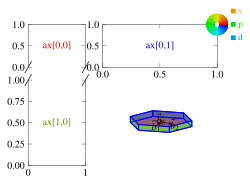

In [ ]:
axs = get_axes(nrows=2,ncols=2,widths=[1,2],heights=[1,2],axes_3d=[(1,1)])
axs[0,0].add_text(0.5,0.5,'ax[0,0]')
axs[0,1].add_text(0.5,0.5,'ax[0,1]',colors='blue')
axs[1,0].add_text(0.5,0.5,'ax[1,0]',colors='olive')
axs[1,0].break_spines(['top'])
axs[0,0].break_spines(['bottom'])
axs[0,1].color_wheel(colormap='RGB')
poscar.splot_bz(axs[1,1],colormap='RGB').set_axis_off()

In [ ]:
#export
class Vasprun:
    """
    - All plotting functions that depend on `export_vasprun` are joined under this class and renamed.
    - **Parameters**
        - path       : str: path/to/vasprun.xml. Auto picks in CWD.
        - skipk      : int: Skip initial kpoints
        - elim       : list: Energy range e.g. [-5,5].
        - shift_kpath: float: Shift in kpath values for side by side plotting.
    - **Attributes**
        - data : Return of `export_vasprun` which is auto-picked in plotting methods under this class.

    > Tip: If KPOINTS file is generated by this module, ticks on kpath are auto-picked. 
    [See Docs](https://massgh.github.io/pivotpy/)
    """
    def __init__(self,path=None,skipk=None,elim=[],shift_kpath=0,try_pwsh=True):
        self.data = vp.export_vasprun(path=path,skipk=skipk,elim=elim,shift_kpath=shift_kpath,try_pwsh=try_pwsh)
        self.elim = elim 
        if path == None:
            kfile = 'KPOINTS'
        else:
            kfile = os.path.join(os.path.dirname(path),'KPOINTS')
        self.kticks = sio.read_ticks(kfile)

    def __handle_kwargs(self,kwargs,dos=False):
        kwargs = {'elim': self.elim, **kwargs}
        if dos:
            return kwargs
        ticks = {k:self.kticks[k] for k in ['ktick_inds','ktick_vals','kseg_inds']}
        kwargs = {**ticks,**kwargs} #Prefer provided ones
        return kwargs

    @_sub_doc(sp.splot_bands,'- path_evr')
    def splot_bands(self,ax = None,**kwargs):
        kwargs = self.__handle_kwargs(kwargs)
        return sp.splot_bands(self.data,ax = ax, **kwargs)
    
    @_sub_doc(sp.splot_dos_lines,'- path_evr')
    def splot_dos_lines(self,elements = [[0],], orbs = [[0],], labels = ['s',], ax = None,**kwargs):
        kwargs = self.__handle_kwargs(kwargs,dos=True)
        return sp.splot_dos_lines(self.data,elements = elements, orbs = orbs, labels = labels, ax = ax, **kwargs)
    
    @_sub_doc(sp.splot_rgb_lines,'- path_evr')
    def splot_rgb_lines(self,elements = [[],[],[]], orbs = [[],[],[]], labels = ['','',''], ax = None, **kwargs):
        kwargs = self.__handle_kwargs(kwargs)
        return sp.splot_rgb_lines(self.data,elements = elements, orbs = orbs, labels = labels, ax = ax, **kwargs)
    
    @_sub_doc(sp.splot_color_lines,'- path_evr')
    def splot_color_lines(self,elements = [[0],], orbs = [[0],], labels = ['s',],axes = None,**kwargs):
        kwargs = self.__handle_kwargs(kwargs)
        return sp.splot_color_lines(self.data,elements = elements, orbs = orbs, labels = labels, axes = axes, **kwargs)
    
    @_sub_doc(ip.iplot_dos_lines,'- path_evr')
    def iplot_dos_lines(self,elements = [[0],], orbs = [[0],], labels = ['s',],**kwargs):
        kwargs = self.__handle_kwargs(kwargs, dos=True)
        return ip.iplot_dos_lines(self.data,elements = elements, orbs = orbs, labels = labels, **kwargs)
    
    @_sub_doc(ip.iplot_rgb_lines,'- path_evr')
    def iplot_rgb_lines(self,elements = [[],[],[]], orbs = [[],[],[]], labels = ['','',''],**kwargs):
        kwargs = self.__handle_kwargs(kwargs)
        return ip.iplot_rgb_lines(self.data,elements = elements, orbs = orbs, labels = labels, **kwargs)

In [ ]:
#hide_input
_doc_class_memebers(Vasprun)

<h4 id="Vasprun.splot_bands" class="doc_header"><code>Vasprun.splot_bands</code><a href="__main__.py#L33" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.splot_bands</code>(**`ax`**=*`None`*, **\*\*`kwargs`**)

- Returns axes object and plot on which all matplotlib allowed actions could be performed.
- **Parameters**
    - ax         : Matplotlib axes object, if not given, one is created.
    - skipk      : Number of kpoints to skip, default will be from IBZKPT.
    - kseg_inds : Points where kpath is broken.
    - elim       : [min,max] of energy range.
    - E_Fermi    : If not given, automatically picked from [`export_vasprun`](/pivotpy/XmlElementTree.html#export_vasprun).
    - ktick_inds : High symmetry kpoints indices.abs
    - ktick_vals  : High Symmetry kpoints labels.
    - txt,xytxt and ctxt are extra arguments for text on figure.
    - interp_nk   : Dictionary with keys 'n' and 'k' for interpolation.

Additional kwargs are passed to matplotlib.lines.Lin2D. For passing a keyword to spindown channel, append an underscore, e.g 'lw' goes to SpinUp and 'lw_' goes to SpinDown.
- **Returns**
    - ax : matplotlib axes object with plotted bands.

<h4 id="Vasprun.splot_dos_lines" class="doc_header"><code>Vasprun.splot_dos_lines</code><a href="__main__.py#L38" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.splot_dos_lines</code>(**`elements`**=*`[[0]]`*, **`orbs`**=*`[[0]]`*, **`labels`**=*`['s']`*, **`ax`**=*`None`*, **\*\*`kwargs`**)

- Returns ax object (if ax!=False) and plot on which all matplotlib allowed actions could be performed, returns lists of energy,tdos and pdos and labels. If given,elements,orbs colors, and labels must have same length. If not given, zeroth ions is plotted with s-orbital.
- **Parameters**)
    - elements   : List [[0],], by defualt and plot first ion's projections.
    - orbs       : List [[0],] lists of indices of orbitals, could be empty.
    - labels     : List [str,] of orbitals labels. len(labels)==len(orbs) must hold.  Auto adds `↑`,`↓` for ISPIN=2.
    - ax         : Matplotlib axes object, if None, one is created. If False, data lists are returned.
    - include_dos: One of {'both','tdos','pdos'}.
    - elim       : [min,max] of energy range.
    - E_Fermi    : If not given, automatically picked from [`export_vasprun`](/pivotpy/XmlElementTree.html#export_vasprun).
    - colormap  : Matplotlib's standard color maps. Default is 'gist_ranibow'. Use 'RGB' if want to compare with [`splot_rgb_lines`](/pivotpy/StaticPlots.html#splot_rgb_lines) with 3 projection inputs (len(orbs)==3).
    - fill_area  : Default is True and plots filled area for dos. If False, plots lines only.
    - vertical   : False, If True, plots along y-axis.
    - showlegend : True by defualt.
    - txt        : Text on figure, if None, SYSTEM's name is printed.
    - xytxt      : [x_coord,y_coord] of text relative to axes.
    - ctxt       : color of text.
    - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
    - interp_nk   : Dictionary with keys 'n' and 'k' for interpolation.
    - legend_kwargs: Dictionary to contain legend arguments to fix.
- **Returns**
    - ax         : Matplotlib axes.

<h4 id="Vasprun.splot_rgb_lines" class="doc_header"><code>Vasprun.splot_rgb_lines</code><a href="__main__.py#L43" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.splot_rgb_lines</code>(**`elements`**=*`[[], [], []]`*, **`orbs`**=*`[[], [], []]`*, **`labels`**=*`['', '', '']`*, **`ax`**=*`None`*, **\*\*`kwargs`**)

- Returns axes object and plot on which all matplotlib allowed actions could be performed. In this function,orbs,labels,elements all have list of length 3. Inside list, sublists or strings could be any length but should be there even if empty.
- **Parameters**
    - elements   : List [[],[],[]] by default and plots s,p,d orbital of system..
    - orbs       : List [[r],[g],[b]] of indices of orbitals, could be empty, but shape should be same.
    - labels     : List [str,str,str] of projection labels. empty string should exist to maintain shape. Auto adds `↑`,`↓` for ISPIN=2. If a label is empty i.e. '', it will not show up in colorbar ticks or legend.
    - ax         : Matplotlib axes object, if not given, one is created.
    - skipk      : Number of kpoints to skip, default will be from IBZKPT.
    - kseg_inds : Points where kpath is broken.
    - elim       : [min,max] of energy range.
    - E_Fermi    : If not given, automatically picked from [`export_vasprun`](/pivotpy/XmlElementTree.html#export_vasprun).
    - ktick_inds : High symmetry kpoints indices.abs
    - ktick_vals  : High Symmetry kpoints labels.
    - max_width  : Width to scale whole projections. if `uni_width=True, width=max_width/2`. Default is None and linewidth at any point = 2.5*sum(ions+orbitals projection of all three input at that point). Linewidth is scaled to max_width if an int or float is given.
    - txt        : Text on figure, if None, SYSTEM's name is printed.
    - xytxt      : [x_coord,y_coord] of text relative to axes.
    - ctxt       : color of text.
    - uni_width  : If True, width of bands kept uniform.
    - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
    - interp_nk  : Dictionary with keys 'n' and 'k' for interpolation.
    - scale_color: Boolean. Default True, colors are scaled to 1 at each point. If False, clips colors in range [0,1] but does not effect linewidth.
    - scale_data : Default is True and normalizes projection data to 1. Has no visual effect if scale_color = True too.
    - colorbar   : Default is True. Displays a vertical RGB colorbar.
    - color_matrix: Only works if `scale_color==True`. 3x3 or 3x4 numpy array or list to transform from RGB to another space,provided that sum(color_matrix[i,:3]) <= 1. 4th column, if given can be used to control the saturation,contrast and brightness as s,c,b = color_matrix[:,3] For simply changing the color intensity use np.diag([r,g,b]) with r,g,b interval in [0,1]. Try `pivotpy.color_matrix` as suggested color matrix and modify, which at s=0 returns gray scale.!
- **Returns**
    - ax : matplotlib axes object with plotted projected bands.
    - Registers as colormap `RGB_m` to use in DOS to plot in same colors and `RGB_f` to display bands colorbar on another axes.
> Note: Two figures made by this function could be comapred quantitatively only if `scale_data=False, max_width=None, scale_color=False` as these parameters act internally on data.

<h4 id="Vasprun.splot_color_lines" class="doc_header"><code>Vasprun.splot_color_lines</code><a href="__main__.py#L48" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.splot_color_lines</code>(**`elements`**=*`[[0]]`*, **`orbs`**=*`[[0]]`*, **`labels`**=*`['s']`*, **`axes`**=*`None`*, **\*\*`kwargs`**)

- Returns axes object and plot on which all matplotlib allowed actions could be performed. If given, elements, orbs, and labels must have same length. If not given, zeroth ion is plotted with s-orbital.
- **Parameters**
    - elements   : List [[0],], by defualt and plot first ion's projections.
    - orbs       : List [[0],] lists of indices of orbitals, could be empty.
    - labels     : List [str,] of orbitals labels. len(labels)==len(orbs) must hold.  Auto adds `↑`,`↓` for ISPIN=2. If a label is empty i.e. '', it will not show up in legend.
    - axes       : Matplotlib axes object with one or many axes, if not given, auto created.
    - skipk      : Number of kpoints to skip, default will be from IBZKPT.
    - kseg_inds : Points where kpath is broken.
    - elim       : [min,max] of energy range.
    - E_Fermi    : If not given, automatically picked from [`export_vasprun`](/pivotpy/XmlElementTree.html#export_vasprun).
    - ktick_inds : High symmetry kpoints indices.abs
    - ktick_vals  : High Symmetry kpoints labels.
    - colormap  : Matplotlib's standard color maps. Default is 'gist_ranibow'.
    - showlegend : True by defualt and displays legend relative to axes[0]. If False, it writes text on individual ax.
    - scale_data : Default is False, If True, normalize projection data to 1.
    - max_width  : Width to scale whole projections. Default is None and linewidth at any point on a line = 2.5*sum(ions+orbitals projection of the input for that line at that point). Linewidth is scaled to max_width if an int or float is given.
    - txt        : Text on figure, if None, SYSTEM's name is printed.
    - xytxt      : [x_coord,y_coord] of text relative to axes.
    - ctxt       : color of text.
    - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
    - interp_nk   : Dictionary with keys 'n' and 'k' for interpolation.
    - legend_kwargs: Dictionary containing legend arguments.
    - **subplots_adjust_kwargs : plt.subplots_adjust parameters.
- **Returns**
    - axes : matplotlib axes object [one or list of axes] with plotted projected bands.
> Note: Two figures made by this function could be comapred quantitatively only if `scale_data=False, max_width=None` as these parameters act internally on data.

<h4 id="Vasprun.iplot_dos_lines" class="doc_header"><code>Vasprun.iplot_dos_lines</code><a href="__main__.py#L53" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.iplot_dos_lines</code>(**`elements`**=*`[[0]]`*, **`orbs`**=*`[[0]]`*, **`labels`**=*`['s']`*, **\*\*`kwargs`**)

- Returns plotly's figure. If given,elements,orbs colors, and labels must have same length. If not given, zeroth ions is plotted with s-orbital.
- **Parameters**)
    - elements   : List [[0,],] of ions indices, by defualt plot first ion's projections.
    - orbs       : List [[0,],] lists of indices of orbitals, could be empty.
    - labels     : List [str,] of orbitals labels. len(labels) == len(orbs) must hold.
    - elim       : [min,max] of energy range.
    - E_Fermi    : If not given, automatically picked from [`export_vasprun`](/pivotpy/XmlElementTree.html#export_vasprun).
    - colormap  : Matplotlib's standard color maps. Default is 'gist_ranibow'. Use 'RGB' if want to compare with [`iplot_rgb_lines`](/pivotpy/InteractivePlots.html#iplot_rgb_lines) with 3 projection inputs (len(orbs)==3).
    - fill_area  : Default is True and plots filled area for dos. If False, plots lines only.
    - vertical   : False, If True, plots along y-axis.
    - interp_nk   : Dictionary with keys 'n' and 'k' for interpolation.
    - figsize   : Tuple(width,height) in pixels, e.g. (700,400).
- **Returns**
    - fig        : Plotly's figure object.

<h4 id="Vasprun.iplot_rgb_lines" class="doc_header"><code>Vasprun.iplot_rgb_lines</code><a href="__main__.py#L58" class="source_link" style="float:right">[source]</a></h4>

> <code>Vasprun.iplot_rgb_lines</code>(**`elements`**=*`[[], [], []]`*, **`orbs`**=*`[[], [], []]`*, **`labels`**=*`['', '', '']`*, **\*\*`kwargs`**)

- Returns plotly's figure object, takes care of spin-polarized calculations automatically. `elements`,`orbs` and `labels` are required to be one-to-one lists of size 3 where each item in list could be another list or integer.
- **Parameters**
    - elements   : List of size 3 of list of indices of ions. If not given, picks all ions for each orbital.
    - orbs       : List of size 3 of list of orbital indices, if not gievn, s,p,d plotted.
    - labels  : List of labels for projection.
    - mode       : Three plotting modes are available:
        - 'markers' : Plot whole data as a single scatter object. Its too fast.
        - 'bands'   : Plot data such that each band is accessible via legend.
        - 'lines'   : A replica of `matplotlib LineCollection` object. It plots at each point separately, slower than other two modes.
        - interp_nk   : Dictionary with keys 'n' and 'k' for interpolation.
        - figsize   : Tuple(width,height) in pixels, e.g. (700,400).
    - **Other Parameters**
        - ktick_inds, ktick_vals,elim,kseg_inds,max_width,title etc.

# Examples
Use `Vasprun` class to plot all related figures.

In [ ]:
vr = Vasprun(path='../graphene_example/ISPIN_1/bands/vasprun.xml')

Loading from PowerShell Exported Data...


<AxesSubplot:ylabel='Energy (eV)'>

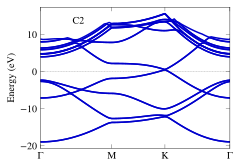

In [ ]:
vr.splot_bands()

<AxesSubplot:>

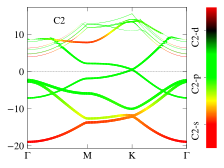

In [ ]:
vr.splot_rgb_lines()

In [ ]:
vr.iplot_rgb_lines()

<AxesSubplot:>

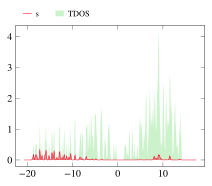

In [ ]:
vr.splot_dos_lines()

In [ ]:
#hide_input
from pivotpy.g_utils import nav_links 
nav_links(7)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
> [&nbsp;`▶` MainAPI●&nbsp;](https://massgh.github.io/pivotpy/MainAPI)  
